In [45]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.misc import imresize
import scipy

In [46]:
img = np.array(Image.open('samples/toy_problem.png')).astype(np.float32)
# img = img[:40, :]
img

array([[ 88.,  88.,  88., ...,  88.,  88.,  88.],
       [ 88.,  88.,  88., ...,  88.,  88.,  88.],
       [ 88.,  88.,  88., ...,  88.,  88.,  88.],
       ..., 
       [ 88.,  88.,  88., ...,  88.,  88.,  88.],
       [ 88.,  88.,  88., ...,  88.,  88.,  88.],
       [ 88.,  88.,  88., ...,  88.,  88.,  88.]], dtype=float32)

In [47]:
def delete_rows_csr(mat, indices):
    """
    Remove the rows denoted by ``indices`` form the CSR sparse matrix ``mat``.
    """
    if not isinstance(mat, scipy.sparse.csr_matrix):
        raise ValueError("works only for CSR format -- use .tocsr() first")
    indices = list(indices)
    mask = np.ones(mat.shape[0], dtype=bool)
    mask[indices] = False
    return mat[mask]

def build_A_and_b(image):
    def b_vector(img):
        flattened = img.flatten()
        diff = np.diff(flattened)
        diff = np.append(diff, 0)
        diff = np.reshape(diff, img.shape)
        return diff[:, :-1].flatten()
    
    def A_matrix(image, row=True):
        num_row, num_col = image.shape
        total_elem = num_row*num_col
        if row:
            return -1 * delete_rows_csr(scipy.sparse.eye(total_elem) + scipy.sparse.diags([(total_elem-1)*[-1]], offsets=[1]), np.arange(num_col-1, total_elem, num_col))
        A = -1 * (scipy.sparse.eye(total_elem) + scipy.sparse.diags([(total_elem-num_col)*[-1]], offsets=[num_col]))[:-num_col, :]
        return A[np.array(list(np.arange(i, (num_row-1)*num_col, num_col) for i in range(num_col))).flatten(), :]
    A_row, b_row = A_matrix(image, row=True), b_vector(image)
    A_col, b_col = A_matrix(image, row=False), b_vector(np.transpose(image))
    A, b = scipy.sparse.vstack((A_row, A_col)), np.append(b_row, b_col)
    return A, b

In [48]:
A, b = build_A_and_b(img)
A = scipy.sparse.vstack((A, np.array([1] + (A.shape[1]-1)*[0])))
b = np.append(b, img[0, 0])

In [49]:
v = scipy.sparse.linalg.lsqr(A, b)[0]

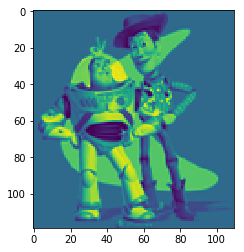

In [50]:
plt.imshow(v.reshape(img.shape))

In [53]:
new_img = v.reshape(img.shape)

In [54]:
np.sqrt(np.sum(img - new_img)**2)

0.11345068954899765

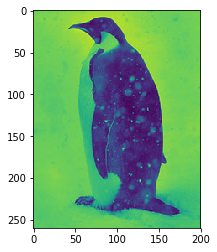

In [82]:
penguin = np.array(Image.open('samples/penguin.jpg').convert('LA')).astype(np.float32)
source_penguin = penguin[190:450, 100:300]
plt.imshow(source_penguin[:, :, 0])

In [85]:
ex = source_penguin[:, :, 0].astype(np.float32)

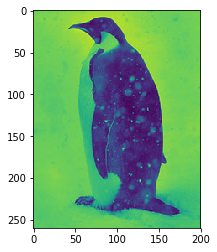

In [86]:
A, b = build_A_and_b(ex)
A = scipy.sparse.vstack((A, np.array([1] + (A.shape[1]-1)*[0])))
b = np.append(b, ex[0, 0])
v = scipy.sparse.linalg.lsqr(A, b)[0]
plt.imshow(v.reshape(ex.shape))